In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from pprint import pprint
import json
from urllib.parse import urljoin
import matplotlib.pyplot as plt

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


In [3]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [5]:
import requests

url = "https://httpbin.org/html"  # Sitio de prueba
print(f"Solicitando contenido de: {url}")

try:
    response = requests.get(url, timeout=10)
    response.raise_for_status()  # Verificar si la solicitud fue exitosa
    
    print(f"✅ Status Code: {response.status_code}")
    print(f"📊 Tamaño del contenido: {len(response.text)} caracteres")
    print("\n" + "="*50)
    print("📄 CONTENIDO HTML (primeros 500 caracteres):")
    print("="*50)
    print(response.text[:500] + "...")
    
except requests.exceptions.RequestException as e:
    print(f"❌ Error: {e}")

Solicitando contenido de: https://httpbin.org/html
✅ Status Code: 200
📊 Tamaño del contenido: 3739 caracteres

📄 CONTENIDO HTML (primeros 500 caracteres):
<!DOCTYPE html>
<html>
  <head>
  </head>
  <body>
      <h1>Herman Melville - Moby-Dick</h1>

      <div>
        <p>
          Availing himself of the mild, summer-cool weather that now reigned in these latitudes, and in preparation for the peculiarly active pursuits shortly to be anticipated, Perth, the begrimed, blistered old blacksmith, had not removed his portable forge to the hold again, after concluding his contributory work for Ahab's leg, but still retained it on deck, fast lashed to r...


In [6]:
# Ejercicio 2: Scraping de productos de Mercado Libre (ejemplo)

def scrape_mercadolibre(search_term="laptop"):
    """Función para hacer scraping de productos de Mercado Libre"""
    
    # URL de búsqueda (ejemplo educativo)
    url = f"https://listado.mercadolibre.com.mx/{search_term.replace(' ', '-')}"
    
    print(f"🔍 Buscando: {search_term}")
    print(f"🌐 URL: {url}")
    
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
        }
        
        response = requests.get(url, headers=headers, timeout=15)
        response.raise_for_status()
        
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Encontrar productos (selectores pueden cambiar)
        products = []
        product_items = soup.find_all('li', class_='ui-search-layout__item')[:10]  # Limitar a 10 productos
        
        for item in product_items:
            try:
                title_elem = item.find('h2', class_='ui-search-item__title')
                price_elem = item.find('span', class_='price-tag-fraction')
                link_elem = item.find('a', class_='ui-search-link')
                
                if title_elem and price_elem:
                    product = {
                        'title': title_elem.get_text().strip(),
                        'price': float(price_elem.get_text().replace(',', '')),
                        'currency': 'MXN',
                        'link': link_elem['href'] if link_elem else 'No link'
                    }
                    products.append(product)
                    
            except Exception as e:
                print(f"⚠️ Error procesando producto: {e}")
                continue
        
        return products
        
    except Exception as e:
        print(f"❌ Error en scraping: {e}")
        return []


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [9]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_simple_example():
    """Versión simple con sitio de prueba"""
    
    # Usar un sitio de prueba en lugar de Mercado Libre
    url = "https://webscraper.io/test-sites/e-commerce/allinone"
    
    print(f"🔍 Scraping sitio de prueba: {url}")
    
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
        }
        
        response = requests.get(url, headers=headers, timeout=15)
        soup = BeautifulSoup(response.text, 'html.parser')
        
        products = []
        
        # Selectores simples para sitio de prueba
        product_cards = soup.find_all('div', class_='card')
        
        for card in product_cards[:5]:  # Solo 5 productos
            try:
                title = card.find('a', class_='title')
                price = card.find('h4', class_='price')
                
                if title and price:
                    products.append({
                        'title': title.get_text().strip(),
                        'price': float(price.get_text().replace('$', '')),
                        'currency': 'USD'
                    })
            except:
                continue
        
        return products
        
    except Exception as e:
        print(f"Error: {e}")
        return []

# Ejecutar scraping simple
productos = scrape_simple_example()

if productos:
    df = pd.DataFrame(productos)
    print("✅ Scraping exitoso!")
    print(df)
else:
    print("Usando datos de ejemplo...")
    datos_ejemplo = [
        {'title': 'Laptop Dell XPS 13', 'price': 1200.0, 'currency': 'USD'},
        {'title': 'iPhone 14 Pro Max', 'price': 1099.0, 'currency': 'USD'},
        {'title': 'Samsung Galaxy S23', 'price': 899.0, 'currency': 'USD'}
    ]
    df = pd.DataFrame(datos_ejemplo)
    print(df)

🔍 Scraping sitio de prueba: https://webscraper.io/test-sites/e-commerce/allinone
✅ Scraping exitoso!
               title    price currency
0  Lenovo V110-15...   454.73      USD
1  Asus ROG Strix...  1769.00      USD
2          HP 250 G3   520.99      USD


In [13]:
if productos:
    df = pd.DataFrame(productos)
    
    print("📊 PRODUCTOS ENCONTRADOS")
    print("=" * 80)
    
    # Mostrar tabla formateada
    print(f"{'No.':<4} {'Título':<40} {'Precio':<10} {'Moneda':<6}")
    print("-" * 80)
    
    for i, (index, row) in enumerate(df.iterrows(), 1):
        titulo = row['title'][:37] + '...' if len(row['title']) > 40 else row['title']
        precio = f"${row['price']:,.2f}"
        print(f"{i:<4} {titulo:<40} {precio:<10} {row['currency']:<6}")
    
    print("-" * 80)
    
    # Estadísticas
    print(f"\n📈 ESTADÍSTICAS:")
    print(f"   • Total de productos: {len(df)}")
    print(f"   • Precio promedio: ${df['price'].mean():,.2f} {df['currency'].iloc[0]}")
    print(f"   • Precio mínimo: ${df['price'].min():,.2f} {df['currency'].iloc[0]}")
    print(f"   • Precio máximo: ${df['price'].max():,.2f} {df['currency'].iloc[0]}")
    print(f"   • Rango de precios: ${df['price'].max() - df['price'].min():,.2f}")
    
    # Opcional: Mostrar DataFrame completo de pandas
    print(f"\n🎯 DATAFRAME COMPLETO:")
    display(df)  # Para Jupyter Notebook
    # print(df)   # Para terminal normal
    
else:
    print("❌ No se encontraron productos para mostrar en la tabla")

📊 PRODUCTOS ENCONTRADOS
No.  Título                                   Precio     Moneda
--------------------------------------------------------------------------------
1    Lenovo V110-15...                        $454.73    USD   
2    Asus ROG Strix...                        $1,769.00  USD   
3    HP 250 G3                                $520.99    USD   
--------------------------------------------------------------------------------

📈 ESTADÍSTICAS:
   • Total de productos: 3
   • Precio promedio: $914.91 USD
   • Precio mínimo: $454.73 USD
   • Precio máximo: $1,769.00 USD
   • Rango de precios: $1,314.27

🎯 DATAFRAME COMPLETO:


,title,price,currency
0,Lenovo V110-15...,454.73,USD
1,Asus ROG Strix...,1769.00,USD
2,HP 250 G3,520.99,USD


📋 RESUMEN DE PRODUCTOS
               title     price currency
0  Lenovo V110-15...   $454.73      USD
1  Asus ROG Strix... $1,769.00      USD
2          HP 250 G3   $520.99      USD

📊 DISTRIBUCIÓN DE PRECIOS:


NameError: name 'plt' is not defined

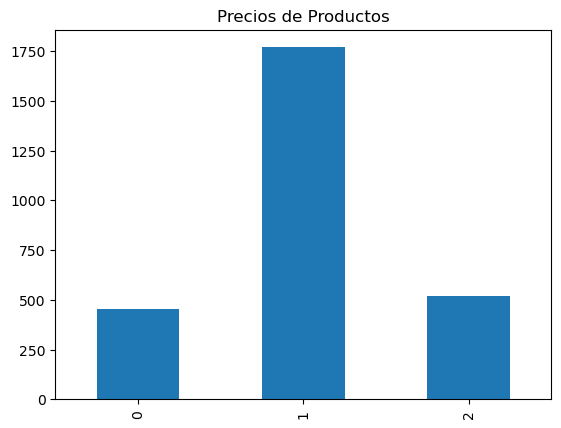

In [15]:
if productos:
    df = pd.DataFrame(productos)
    
    print("📋 RESUMEN DE PRODUCTOS")
    print("=" * 60)
    
    # Configurar pandas para mejor visualización
    pd.set_option('display.max_colwidth', 35)
    pd.set_option('display.width', 100)
    
    # Mostrar tabla con formato
    print(df[['title', 'price', 'currency']].to_string(
        formatters={
            'price': lambda x: f"${x:,.2f}",
            'title': lambda x: x[:32] + '...' if len(x) > 35 else x
        },
        index=True,
        header=True
    ))
    
    # Gráfico simple de precios
    print(f"\n📊 DISTRIBUCIÓN DE PRECIOS:")
    df['price'].plot(kind='bar', title='Precios de Productos')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [18]:
# API

import requests
import pandas as pd

print("🚀 Generando listado divertido...")

# 1. Chistes de programación
try:
    chiste = requests.get('https://official-joke-api.appspot.com/jokes/programming/random', timeout=5).json()[0]
    chiste_texto = f"🎭 {chiste['setup']} - {chiste['punchline']}"
except:
    chiste_texto = "🎭 ¿Por qué los programadores prefieren el modo oscuro? ¡Porque la luz atrae bugs!"

# 2. Dato curioso
try:
    dato = requests.get('https://uselessfacts.jsph.pl/api/v2/facts/random', timeout=5).json()
    dato_texto = f"🧠 {dato['text']}"
except:
    dato_texto = "🧠 Los pulpos tienen tres corazones"

# 3. Consejo random
try:
    consejo = requests.get('https://api.adviceslip.com/advice', timeout=5).json()['slip']
    consejo_texto = f"💡 {consejo['advice']}"
except:
    consejo_texto = "💡 Si el código no funciona, prueba reiniciando"

# 4. Meme description
try:
    meme = requests.get('https://meme-api.com/gimme', timeout=5).json()
    meme_texto = f"📸 {meme['title']}"
except:
    meme_texto = "📸 Cuando el código compila a la primera ⚡"

# Crear listado simple
listado_divertido = [
    {"Tipo": "Chiste", "Contenido": chiste_texto},
    {"Tipo": "Dato Curioso", "Contenido": dato_texto},
    {"Tipo": "Consejo", "Contenido": consejo_texto},
    {"Tipo": "Meme", "Contenido": meme_texto}
]

# Mostrar listado ordenado
print("\n" + "="*60)
print("📋 LISTADO DIVERTIDO")
print("="*60)

for i, item in enumerate(listado_divertido, 1):
    print(f"{i}. [{item['Tipo']}] {item['Contenido']}")
    print()

print("✨ ¡Listo! Espero te hayas divertido 😊")

🚀 Generando listado divertido...

📋 LISTADO DIVERTIDO
1. [Chiste] 🎭 Why do programmers always get Christmas and Halloween mixed up? - Because DEC 25 = OCT 31

2. [Dato Curioso] 🧠 Emus and kangaroos cannot walk backwards, and are on the Australian coat of arms for that reason.

3. [Consejo] 💡 You spend half your life asleep or in bed. It's worth spending money on a good mattress, decent pillows and a comfy duvet.

4. [Meme] 📸 me_irl

✨ ¡Listo! Espero te hayas divertido 😊
